# 1. Setup and Data Loading

In [171]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='darkgrid', context='talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

parking_df = pd.read_csv('basic_management.csv', low_memory=False)

parking_df.head()


,ID,Installation,Type,Source type,Unit,Zone,Fee,Plate,Collection GUID,Date,Starting date,End date,Payment type,PT1 amount,PT1 change applied,PT1 changed value,Payment type (1),PT2 amount,PT2 change applied,PT2 changed value,Amount,Amount with bonification,Bonification,Online,Time,Status,Insertion date (UTC),Card ID,Email,Amount refunded,Amount refunded with bonification,Refunded ID,External provider,Transaction ID,External unit,UTC Date,Starting date (UTC),End date (UTC),Comments,Transaction ID.1,Card #,Card expiration,Transaction status,Status date (UTC),Transaction retries,Card Track 1,Card Track 2,Movement of Balance status,Movement of Balance,Ticket Number,Coupon Amount,Number of Coupons,Cards,Wallet Balance,Previous Wallet Balance,Parking space,Parking space 2,Parking space 3,Parking space 4,Parking space 5,Parking space 6,Parking space 7,Parking space 8,Parking space 9,Parking space 10,Description parking space 1,Description parking space 2,Description parking space 3,Description parking space 4,Description parking space 5,Description parking space 6,Description parking space 7,Description parking space 8,Description parking space 9,Description parking space 10,Plate 2,Plate 3,Plate 4,Plate 5,Plate 6,Plate 7,Plate 8,Plate 9,Plate 10,AmountDebt,Hope Insertion Date,Hope Gps Latitude,Hope Gps Longitude,Hope Balance Before,Hope External Id1,Hope External Id2,Hope External Id3,Hope Confirmed In Ws1,Hope Confirmed In Ws2,Hope Confirmed In Ws3,Hope Confirm In Ws1 Retries Num,Hope Confirm In Ws2 Retries Num,Hope Confirm In Ws3 Retries Num,Hope Confirm In Ws1 Date,Hope Confirm In Ws2 Date,Hope Confirm In Ws3 Date,Hope Confirmation Time In Ws1,Hope Confirmation Time In Ws2,Hope Confirmation Time In Ws3,Hope Queue Length Before Confirm Ws1,Hope Queue Length Before Confirm Ws2,Hope Queue Length Before Confirm Ws3,Hope Base Chain Ope Id,Hope Base Chain Inidate,Hope Base Chain Inidate Utc,Hope Chain Amount,Hope Chain Last Operation,Hope Chain Time,Hope Log Grp Id,Hope Entry Date,Hope Exit Date,Hope Entry Date Utc,Hope Exit Date Utc,Hope Pwl Id,Hope Sur Id,Hope Postpay,Hope Auth Id,Hope Transaction Ref,Hope Entering Camhope Id,Hope Leaving Camhope Id,Hope End Sync Ws1,Hope End Sync Ws2,Hope End Sync Ws3,Hope Plvc Id,Hope Voucher Amount,Hope Voucher Balance Before,Hope Additional Params,Hope Grace Type,Hope Stse Id,Hope Receipt Email,Hope Receipt Sent,Hope Receipt Sent Date Utc,Hope Receipt Lan Id,Hope Listener Received Utc Date,Hope Listener Insertion Utc Date,Hope Brt Id,Hope Tariff Cur Id,Hope Tariff Amount,Hope Tariff Amount Change,Hope Ext Data,Hope Vehicle Type,Hope Vht Id
0,142055622,Banff,Parking,External,NaN,Downtown,Residents Rate,CRS8662,NaN,2025-01-19 19:48,2025-01-19 19:48,2025-01-19 20:00,Pay by phone,$-,1,$-,NaN,NaN,NaN,NaN,$-,$-,1.0,1,12,Confirmed,2025-01-20 2:49,NaN,NaN,NaN,NaN,NaN,BLINKAY.APP,25387303.0,NaN,2025-01-20 2:48,2025-01-20 2:48,2025-01-20 3:00,NaN,NaN,NaN,NaN,NaN,2025-01-20 2:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-19 19:49,51.17638,-115.56979,NaN,2248186,NaN,NaN,1,1,1,NaN,NaN,NaN,2025-01-20 2:49,2025-01-20 2:49,2025-01-20 2:49,879,0,0,1,1,1,142055622,2025-01-19 19:48,2025-01-20 2:48,0,1,12,46301,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,142055617,Banff,Parking,External,NaN,Downtown,Residents Rate,JUT549,NaN,2025-01-19 19:45,2025-01-19 19:45,2025-01-19 20:00,Pay by phone,$-,1,$-,NaN,NaN,NaN,NaN,$-,$-,1.0,1,15,Confirmed,2025-01-20 2:46,NaN,NaN,NaN,NaN,NaN,BLINKAY.APP,25387298.0,NaN,2025-01-20 2:45,2025-01-20 2:45,2025-01-20 3:00,NaN,NaN,NaN,NaN,NaN,2025-01-20 2:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-19 19:46,51.17666,-115.57157,NaN,2248185,NaN,NaN,1,1,1,NaN,NaN,N

# 2. Data Understanding


In [172]:
# Info and structure
parking_df.info()
parking_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8322 entries, 0 to 8321
Columns: 147 entries, ID to Hope Vht Id
dtypes: float64(87), int64(24), object(36)
memory usage: 9.3+ MB


,ID,PT1 change applied,Payment type (1),PT2 amount,PT2 change applied,PT2 changed value,Bonification,Online,Time,Card ID,Email,Amount refunded,Amount refunded with bonification,Refunded ID,Transaction ID,External unit,Comments,Card #,Card expiration,Transaction retries,Card Track 2,Movement of Balance status,Movement of Balance,Ticket Number,Number of Coupons,Cards,Wallet Balance,Previous Wallet Balance,Parking space,Parking space 2,Parking space 3,Parking space 4,Parking space 5,Parking space 6,Parking space 7,Parking space 8,Parking space 9,Parking space 10,Description parking space 1,Description parking space 2,Description parking space 3,Description parking space 4,Description parking space 5,Description parking space 6,Description parking space 7,Description parking space 8,Description parking space 9,Description parking space 10,Plate 2,Plate 3,Plate 4,Plate 5,Plate 6,Plate 7,Plate 8,Plate 9,Plate 10,AmountDebt,Hope Gps Latitude,Hope Gps Longitude,Hope Balance Before,Hope External Id1,Hope External Id2,Hope External Id3,Hope Confirmed In Ws1,Hope Confirmed In Ws2,Hope Confirmed In Ws3,Hope Confirm In Ws1 Retries Num,Hope Confirm In Ws2 Retries Num,Hope Confirm In Ws3 Retries Num,Hope Confirmation Time In Ws1,Hope Confirmation Time In Ws2,Hope Confirmation Time In Ws3,Hope Queue Length Before Confirm Ws1,Hope Queue Length Before Confirm Ws2,Hope Queue Length Before Confirm Ws3,Hope Base Chain Ope Id,Hope Chain Amount,Hope Chain Last Operation,Hope Chain Time,Hope Log Grp Id,Hope Entry Date,Hope Exit Date,Hope Entry Date Utc,Hope Exit Date Utc,Hope Pwl Id,Hope Sur Id,Hope Postpay,Hope Auth Id,Hope Entering Camhope Id,Hope Leaving Camhope Id,Hope End Sync Ws1,Hope End Sync Ws2,Hope End Sync Ws3,Hope Plvc Id,Hope Voucher Amount,Hope Voucher Balance Before,Hope Additional Params,Hope Grace Type,Hope Stse Id,Hope Receipt Email,Hope Receipt Sent,Hope Receipt Sent Date Utc,Hope Receipt Lan Id,Hope Brt Id,Hope Tariff Cur Id,Hope Tariff Amount,Hope Tariff Amount Change,Hope Ext Data,Hope Vehicle Type,Hope Vht Id
count,8.322000e+03,8322.0,0.0,0.0,0.0,0.0,4878.0,8322.000000,8322.000000,0.0,0.0,0.0,0.0,0.0,4.878000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3444.000000,3444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5842.000000,5842.000000,0.0,8.322000e+03,0.0,0.0,8322.0,8322.0,8322.0,0.0,0.0,0.0,8322.000000,8322.0,8322.0,8322.000000,8322.000000,8322.000000,8.322000e+03,8322.000000,8322.000000,8322.000000,8322.0,0.0,0.0,0.0,0.0,0.0,0.0,8322.0,0.0,0.0,0.0,8322.0,8322.0,8322.0,0.0,0.0,0.0,0.0,8322.0,0.0,0.0,0.0,0.0,3155.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.419288e+08,1.0,NaN,NaN,NaN,NaN,1.0,0.996996,105.453857,NaN,NaN,NaN,NaN,NaN,2.532434e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59131.303136,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.774756,-112.406424,NaN,2.244209e+06,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,565.914203,0.0,0.0,1.241288,1.241288,1.241288,1.419281e+08,1006.276015,0.929584,113.430065,46301.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.028526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.208458e+05,0.0,NaN,NaN,NaN,NaN,0.0,0.054730,73.055366,NaN,NaN,NaN,NaN,NaN,5.545736e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43580.858239,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.353254,18.864169,NaN,2.280392e+03,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,120.265566,0.0,0.0,0.577332,0.577332,0.577332,1.211924e+05,1039.699678,0.255862,76.990075,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.237184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.416767e+08,1.0,NaN,NaN,NaN,NaN,1.0,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2.521403e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2142.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [173]:
# Missing values
missing = parking_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(parking_df)) * 100 
missing_df = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_df)   

                                      missing_count  missing_percent
Description parking space 9                    8322       100.000000
Hope External Id2                              8322       100.000000
AmountDebt                                     8322       100.000000
Plate 10                                       8322       100.000000
Plate 9                                        8322       100.000000
Plate 8                                        8322       100.000000
Plate 7                                        8322       100.000000
Plate 6                                        8322       100.000000
Plate 5                                        8322       100.000000
Plate 4                                        8322       100.000000
Plate 3                                        8322       100.000000
Plate 2                                        8322       100.000000
Description parking space 10                   8322       100.000000
Description parking space 8       

In [174]:
# Unique values
parking_df.nunique()

ID                                      8322
Installation                               1
Type                                       2
Source type                                2
Unit                                      24
Zone                                       1
Fee                                        2
Plate                                   5833
Collection GUID                           30
Date                                    3762
Starting date                           3715
End date                                3423
Payment type                               3
PT1 amount                                40
PT1 change applied                         1
PT1 changed value                         40
Payment type (1)                           0
PT2 amount                                 0
PT2 change applied                         0
PT2 changed value                          0
Amount                                    41
Amount with bonification                  22
Bonificati

In [175]:
# Function to compare two columns

def compare_cols(df, col1, col2):
    if df[col1].equals(df[col2]):
        return 'Identical'
    return 'Different' 


## Time analysis

In [176]:
# Compare date and starting data columns

print(f'Date and starting date columns are: {compare_cols(parking_df, 'Date', 'Starting date')} ')

parking_df.loc[parking_df['Date'] != parking_df['Starting date'], ['Date', 'Starting date']]

Date and starting date columns are: Different 


,Date,Starting date
89,2025-01-19 18:02,2025-01-19 18:20
98,2025-01-19 17:58,2025-01-19 18:06
101,2025-01-19 17:56,2025-01-19 18:03
147,2025-01-19 17:28,2025-01-19 17:29
152,2025-01-19 17:25,2025-01-19 17:31
167,2025-01-19 17:21,2025-01-19 17:26
219,2025-01-19 16:51,2025-01-19 17:23
222,2025-01-19 16:49,2025-01-19 16:51
248,2025-01-19 16:33,2025-01-19 17:27
253,2025-01-19 16:31,2025-01-19 18:28


### Extracting start and end dates and times 

In [177]:
parking_df['Duration'] = pd.to_datetime(parking_df['End date']) - pd.to_datetime(parking_df['Starting date'])
parking_df['Start date'] = pd.to_datetime(parking_df['Starting date']).dt.date
parking_df['End date'] = pd.to_datetime(parking_df['End date']).dt.date
parking_df['Start time'] = pd.to_datetime(parking_df['Starting date']).dt.time  
parking_df['End time'] = pd.to_datetime(parking_df['End date']).dt.time

In [178]:
# Convert duration to hours
parking_df['Duration hours'] = parking_df['Duration'].dt.total_seconds() / 3600 

In [179]:
parking_df['Duration'].sort_values(ascending=True).head()

3084   -1 days +11:38:00
2804   -1 days +23:44:00
3107     0 days 00:00:00
1933     0 days 00:00:00
253      0 days 00:00:00
Name: Duration, dtype: timedelta64[ns]

In [180]:
parking_df['Duration hours'].sort_values(ascending=True).head()

3084   -12.366667
2804    -0.266667
3107     0.000000
1933     0.000000
253      0.000000
Name: Duration hours, dtype: float64

#### Negative duration values

Noticed that there were two rows that had negative parking durations. Analysis of the data showed that these two rows had the exit date earlier than the entry date. These two rows were removed from the dataset.

In [181]:
negative_durations = parking_df.loc[[3084, 2804]]
negative_durations.head()

,ID,Installation,Type,Source type,Unit,Zone,Fee,Plate,Collection GUID,Date,Starting date,End date,Payment type,PT1 amount,PT1 change applied,PT1 changed value,Payment type (1),PT2 amount,PT2 change applied,PT2 changed value,Amount,Amount with bonification,Bonification,Online,Time,Status,Insertion date (UTC),Card ID,Email,Amount refunded,Amount refunded with bonification,Refunded ID,External provider,Transaction ID,External unit,UTC Date,Starting date (UTC),End date (UTC),Comments,Transaction ID.1,Card #,Card expiration,Transaction status,Status date (UTC),Transaction retries,Card Track 1,Card Track 2,Movement of Balance status,Movement of Balance,Ticket Number,Coupon Amount,Number of Coupons,Cards,Wallet Balance,Previous Wallet Balance,Parking space,Parking space 2,Parking space 3,Parking space 4,Parking space 5,Parking space 6,Parking space 7,Parking space 8,Parking space 9,Parking space 10,Description parking space 1,Description parking space 2,Description parking space 3,Description parking space 4,Description parking space 5,Description parking space 6,Description parking space 7,Description parking space 8,Description parking space 9,Description parking space 10,Plate 2,Plate 3,Plate 4,Plate 5,Plate 6,Plate 7,Plate 8,Plate 9,Plate 10,AmountDebt,Hope Insertion Date,Hope Gps Latitude,Hope Gps Longitude,Hope Balance Before,Hope External Id1,Hope External Id2,Hope External Id3,Hope Confirmed In Ws1,Hope Confirmed In Ws2,Hope Confirmed In Ws3,Hope Confirm In Ws1 Retries Num,Hope Confirm In Ws2 Retries Num,Hope Confirm In Ws3 Retries Num,Hope Confirm In Ws1 Date,Hope Confirm In Ws2 Date,Hope Confirm In Ws3 Date,Hope Confirmation Time In Ws1,Hope Confirmation Time In Ws2,Hope Confirmation Time In Ws3,Hope Queue Length Before Confirm Ws1,Hope Queue Length Before Confirm Ws2,Hope Queue Length Before Confirm Ws3,Hope Base Chain Ope Id,Hope Base Chain Inidate,Hope Base Chain Inidate Utc,Hope Chain Amount,Hope Chain Last Operation,Hope Chain Time,Hope Log Grp Id,Hope Entry Date,Hope Exit Date,Hope Entry Date Utc,Hope Exit Date Utc,Hope Pwl Id,Hope Sur Id,Hope Postpay,Hope Auth Id,Hope Transaction Ref,Hope Entering Camhope Id,Hope Leaving Camhope Id,Hope End Sync Ws1,Hope End Sync Ws2,Hope End Sync Ws3,Hope Plvc Id,Hope Voucher Amount,Hope Voucher Balance Before,Hope Additional Params,Hope Grace Type,Hope Stse Id,Hope Receipt Email,Hope Receipt Sent,Hope Receipt Sent Date Utc,Hope Receipt Lan Id,Hope Listener Received Utc Date,Hope Listener Insertion Utc Date,Hope Brt Id,Hope Tariff Cur Id,Hope Tariff Amount,Hope Tariff Amount Change,Hope Ext Data,Hope Vehicle Type,Hope Vht Id,Duration,Start date,Start time,End time,Duration hours
3084,142023693,Banff,Parking,External,NaN,Downtown,Regular Rate,CSM9989,NaN,2025-01-18 8:22,2025-01-18 8:22,2025-01-17,Pay by phone,$24.50,1,$24.50,NaN,NaN,NaN,NaN,$24.50,$24.50,1.0,1,196,Confirmed,2025-01-18 15:22,NaN,NaN,NaN,NaN,NaN,BLINKAY.APP,25368549.0,NaN,2025-01-18 15:22,2025-01-18 15:22,2025-01-18 3:00,NaN,NaN,NaN,NaN,NaN,2025-01-18 15:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-18 8:22,NaN,NaN,NaN,2245231,NaN,NaN,1,1,1,NaN,NaN,NaN,2025-01-18 15:22,2025-01-18 15:22,2025-01-18 15:22,743,0,0,1,1,1,142023693,2025-01-18 8:22,2025-01-18 15:22,2450,1,196,46301,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1 days +11:38:00,2025-01-18,08:22:00,00:00:00,-12.366667
2804,142032677,Banff,Parking,External,NaN,Downtown,Regular Rate,BVT6445,NaN,2025-01-18 11:19,2025-01-18 11:19,2025-01-18,Pay by phone,$7.00,1,$7.00,NaN,NaN,NaN,NaN,$7.00,$7.00,1.0,1,60,Confirmed,2025-01-18 18:20,NaN,NaN,NaN,NaN,NaN,BLINKAY.APP,25373604.0,NaN,2025-01-18 18:19,2025-01-18 18:19,2025-01-18 18:03,NaN,NaN,NaN,NaN,NaN,2025-01-18 18:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [182]:
parking_df = parking_df.drop([3084, 2804]).reset_index(drop=True)

### Parking time plots

#### Duration hours boxplot for outliers

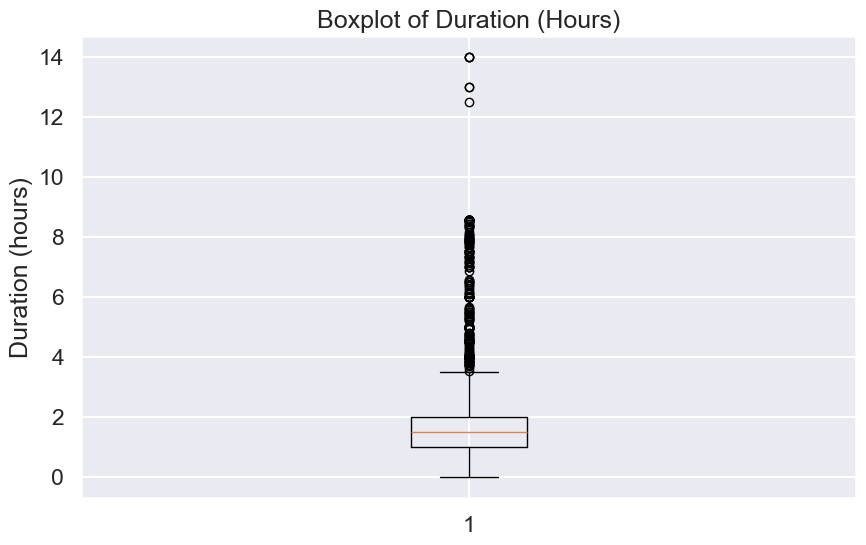

In [183]:
plt.figure(figsize=(10,6))
plt.boxplot(parking_df['Duration hours'].dropna(), vert=True)
plt.ylabel('Duration (hours)')
plt.title('Boxplot of Duration (Hours)')
plt.show()

##### Identifying duration outliers

We can see from the analysis that it seems as though parking duration outliers all come from entries that do not have an exit time. 

In [184]:
Q1 = parking_df['Duration hours'].quantile(0.25)
Q3 = parking_df['Duration hours'].quantile(0.75)
IQR = Q3 - Q1

outliers = parking_df[(parking_df['Duration hours'] < Q1 - 1.5 * IQR) | (parking_df['Duration hours'] > Q3 + 1.5 * IQR)]

outliers['Duration hours'].describe()

count    355.000000
mean       5.806714
std        1.970427
min        3.516667
25%        4.000000
50%        5.000000
75%        7.491667
max       14.000000
Name: Duration hours, dtype: float64

In [185]:
outliers[['Start date', 'Start time', 'End date', 'End time']]  

,Start date,Start time,End date,End time
264,2025-01-19,16:29:00,2025-01-19,00:00:00
275,2025-01-19,16:23:00,2025-01-19,00:00:00
290,2025-01-19,16:16:00,2025-01-19,00:00:00
291,2025-01-19,16:16:00,2025-01-19,00:00:00
308,2025-01-19,16:01:00,2025-01-19,00:00:00
328,2025-01-19,15:57:00,2025-01-19,00:00:00
332,2025-01-19,15:54:00,2025-01-19,00:00:00
341,2025-01-19,15:48:00,2025-01-19,00:00:00
372,2025-01-19,15:25:00,2025-01-19,00:00:00
378,2025-01-19,15:19:00,2025-01-19,00:00:00


In [186]:
parking_df = parking_df[parking_df['Duration hours'] <= Q3 + 1.5 * IQR].copy()

#### Duration histogram

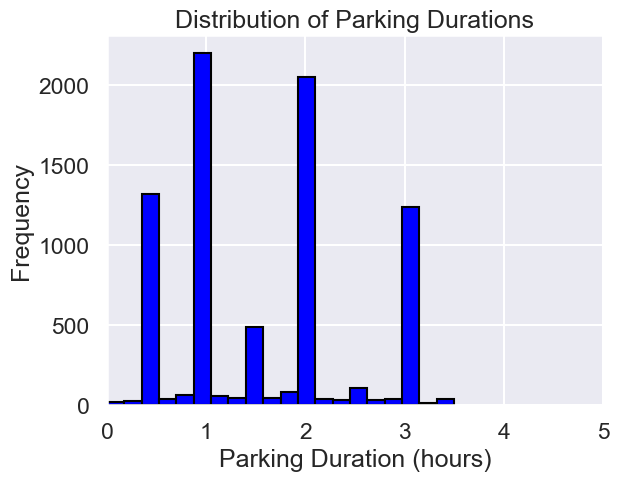

In [187]:
parking_df['Duration hours'].plot(kind='hist', bins=20, edgecolor='black', color='blue')
plt.xlabel('Parking Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Parking Durations')
plt.xlim(0, 5)
plt.show()


#### Average duration per day

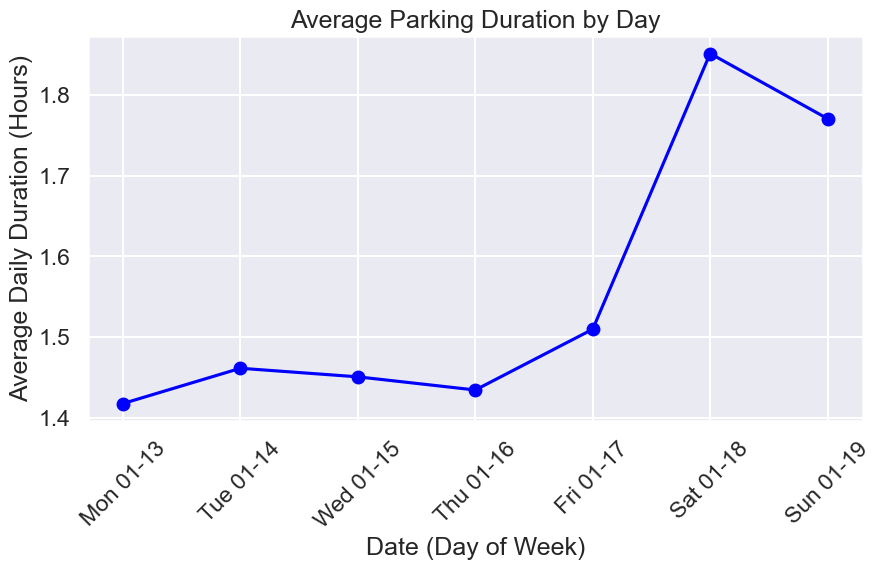

In [188]:
parking_df['Weekday'] = pd.to_datetime(parking_df['Start date']).dt.day_name().str[:3]

daily_avg = parking_df.groupby('Start date')['Duration hours'].mean()

labels = [f"{parking_df.loc[parking_df['Start date'] == d, 'Weekday'].iloc[0]} {d.strftime('%m-%d')}"
          for d in daily_avg.index]

plt.figure(figsize=(10,5))
plt.plot(daily_avg.index, daily_avg.values, marker='o', color='blue')
plt.xticks(daily_avg.index, labels, rotation=45)
plt.xlabel('Date (Day of Week)')
plt.ylabel('Average Daily Duration (Hours)')    
plt.title('Average Parking Duration by Day')    
plt.show()

#### Parking counts per day

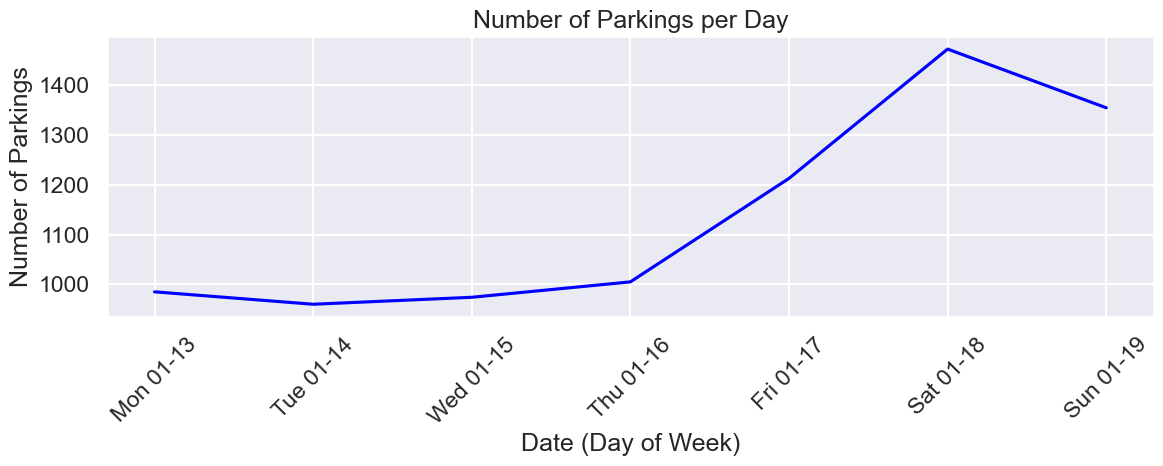

In [189]:
daily_counts = parking_df.groupby('Start date').size()

labels = [f"{parking_df.loc[parking_df['Start date'] == d, 'Weekday'].iloc[0]} {d.strftime('%m-%d')}"
          for d in daily_counts.index]

plt.figure(figsize=(12,5))
plt.plot(daily_counts.index, daily_counts.values, color='blue')
plt.xticks(daily_counts.index, labels, rotation=45)
plt.xlabel('Date (Day of Week)')
plt.ylabel('Number of Parkings')
plt.title('Number of Parkings per Day')
plt.tight_layout()
plt.show()



#### Duration vs time of day

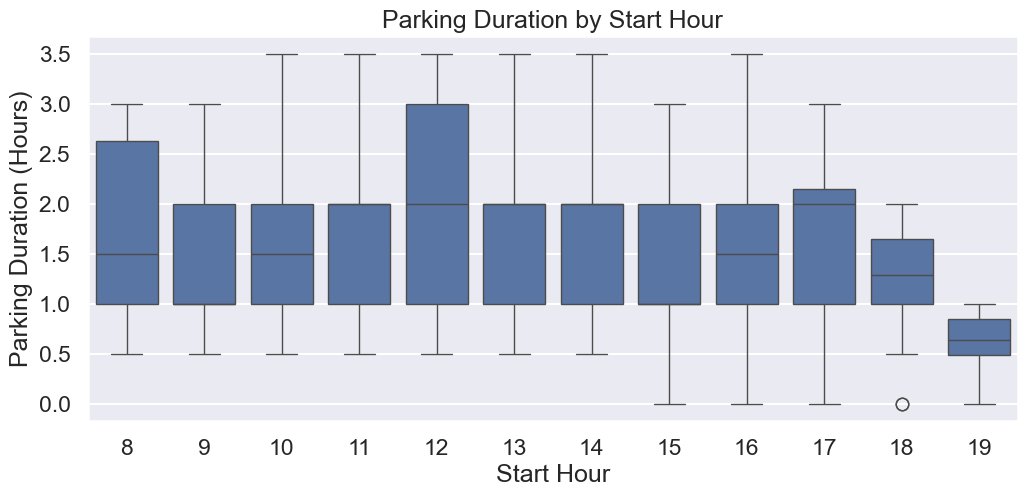

In [190]:
parking_df['Start hour'] = pd.to_datetime(parking_df['Starting date'].astype(str)).dt.hour

plt.figure(figsize=(12,5))
sns.boxplot(x='Start hour', y='Duration hours', data=parking_df)
plt.xlabel('Start Hour')
plt.ylabel('Parking Duration (Hours)')
plt.title('Parking Duration by Start Hour')
plt.show()

